#### Importação das bibliotecas

In [45]:
# processamento de dados
import pandas as pd
import numpy as np

# dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# filtrar avisos de erros
import warnings
warnings.filterwarnings('ignore')

#### Importação do dataset

In [46]:
path_dataset =  r'D:\Documentos\Projetos\student_performance_predictions_01-09-2024\Dados\student_performance.csv'

dados_orig = pd.read_csv(path_dataset)

dados_orig.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


#### EDA

In [47]:
# verificando a dimensão do dataset
num_linhas, num_colunas = dados_orig.shape

print(f'Número de linhas: {num_linhas}')
print(f'Número de colunas: {num_colunas}')

Número de linhas: 10
Número de colunas: 9


Como é um dataset direcionado para estudo de machine learning possui um número pequeno de dados

In [48]:
# verificando tipo de dados
dados_orig.dtypes

StudentID                     int64
Name                         object
Gender                       object
AttendanceRate                int64
StudyHoursPerWeek             int64
PreviousGrade                 int64
ExtracurricularActivities     int64
ParentalSupport              object
FinalGrade                    int64
dtype: object

Os tipo de dados estão de acordo com as features

In [49]:
# verificando dados nulos e linhas duplicadas
print(f'Quantidade de dados nulos no dataset: {dados_orig.isnull().sum().sum()}')
print(f'Quantidade de linhas duplicadas no dataset: {dados_orig.duplicated().sum()}')

Quantidade de dados nulos no dataset: 0
Quantidade de linhas duplicadas no dataset: 0


In [50]:
# estatisticas 
dados_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
AttendanceRate,10.0,85.6,7.441625,70.0,82.75,86.5,90.75,95.0
StudyHoursPerWeek,10.0,17.7,6.848357,8.0,12.75,17.5,21.50,30.0
PreviousGrade,10.0,78.1,10.170218,60.0,71.75,80.0,85.75,90.0
ExtracurricularActivities,10.0,1.5,1.080123,0.0,1.00,1.5,2.00,3.0
FinalGrade,10.0,80.2,10.097304,62.0,73.50,82.5,87.75,92.0


Pode-ser observar que os números estão concentrados, o desvio padrão é pequeno

<Axes: >

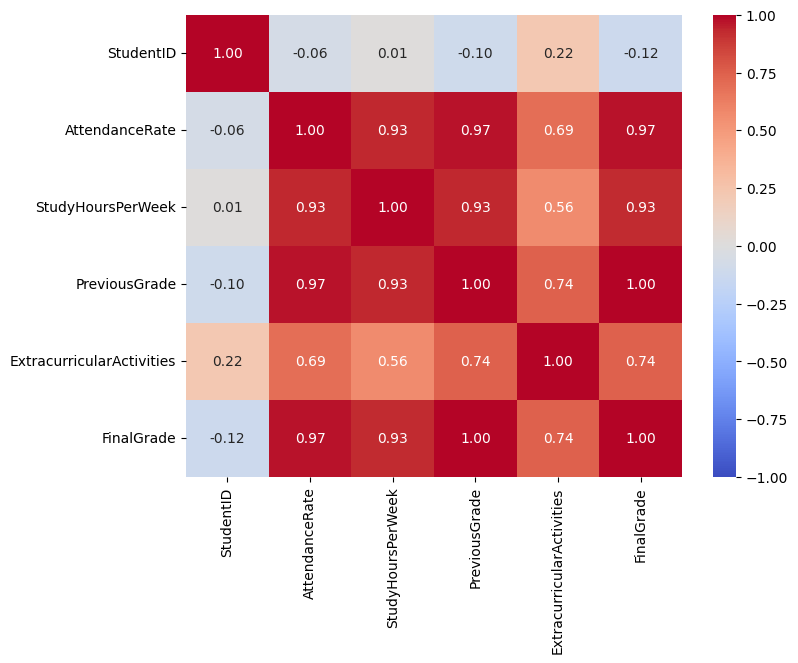

In [51]:
# avaliando as correlações
matrix_corr = dados_orig.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

Sabendo que a variável target será 'FinalGrade'

Avaliando as variáveis numéricas, exceto 'studentID' por se tratar apenas de um codigo de cada aluno, existe uma forte correlação entre as variáveis

Portanto irei criar um no df sem a variável 'studentID'

In [52]:
# copia do df original para fazer manipulaçoes
dados = dados_orig.copy().drop(['StudentID'], axis=1)

Avaliando a variável categoria 'gender'

In [53]:
dados['Gender'].value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

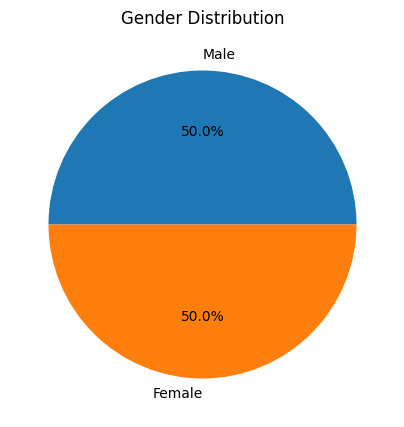

In [54]:
plt.figure(figsize=(5, 5))
plt.pie(dados['Gender'].value_counts(), labels=dados['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()